In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
class Discriminator(nn.Module):
  def __init__(self, in_features):
    super().__init__()
    self.disc = nn.Sequential(
        nn.Linear(in_features, 128),
        nn.LeakyReLU(0.2),
        nn.Linear(128, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.disc(x)

In [3]:
class Generator(nn.Module):
  def __init__(self, img_dim, z_dim):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(z_dim, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, img_dim),
        nn.Tanh()
    )

  def forward(self, x):
    return self.gen(x)

In [4]:
# Hyper params
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 3e-4
z_dim = 64
img_dim = 28*28*1
batch_size = 32
num_epochs = 50

criterion = nn.BCELoss()

In [5]:
# Transforms and DataLoaders
transform_list = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(root='', train=True, download=True, transform=transform_list)
dataloader = DataLoader(dataset, batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
# Define models
gen = Generator(img_dim, z_dim)
disc = Discriminator(img_dim)

In [ ]:
# Optimizers
gen_opt = optim.Adam(gen.parameters(), lr=lr)
disc_opt = optim.Adam(disc.parameters(), lr=lr)

In [ ]:
def show_tensor_images(image_tensor, num_images=25, size=(1, 28, 28)):    
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in a uniform grid.
    '''
    # Clip between 0 - 1
    image_tensor = image_tensor / 2 + 0.5

    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

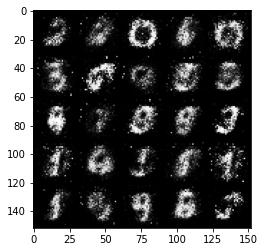

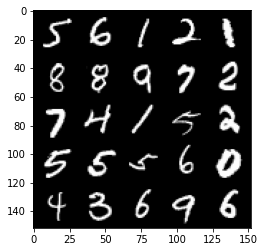

Epoch 0, disc loss - 0.5821945667266846, gen loss - 0.9903894662857056


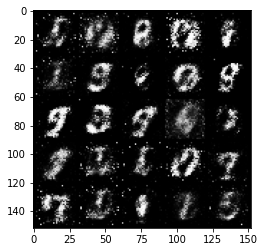

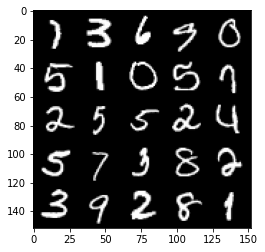

Epoch 1, disc loss - 0.7362416982650757, gen loss - 1.1080411672592163


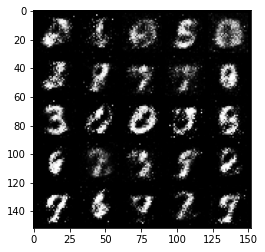

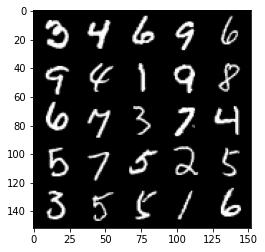

Epoch 2, disc loss - 0.5933647155761719, gen loss - 1.1839395761489868


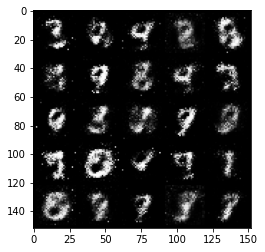

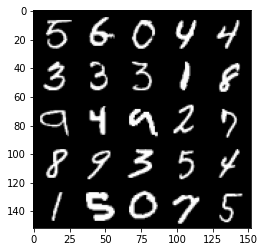

Epoch 3, disc loss - 0.6091825366020203, gen loss - 0.9721171855926514


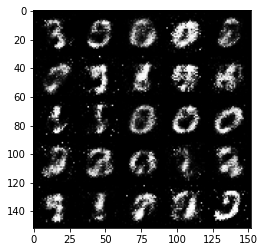

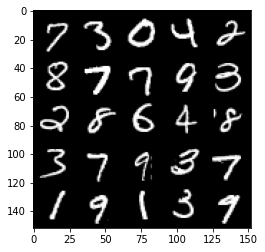

Epoch 4, disc loss - 0.692798912525177, gen loss - 0.9162125587463379


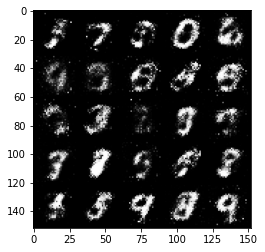

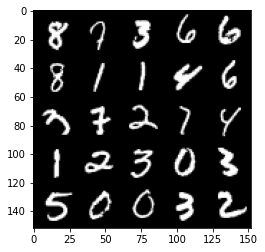

Epoch 5, disc loss - 0.7377293705940247, gen loss - 0.9394036531448364


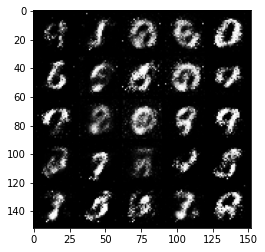

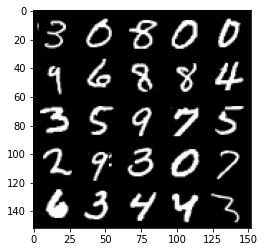

Epoch 6, disc loss - 0.5911757946014404, gen loss - 1.1988089084625244


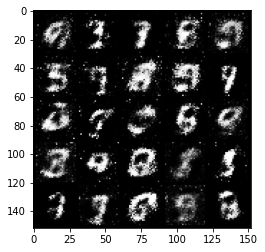

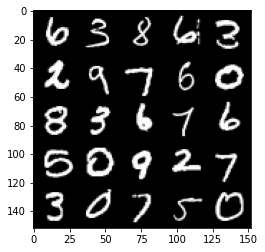

Epoch 7, disc loss - 0.5889005064964294, gen loss - 1.1019983291625977


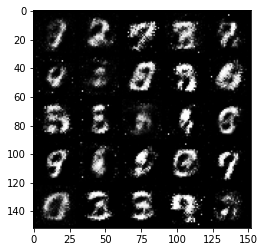

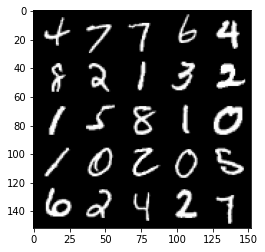

Epoch 8, disc loss - 0.55755615234375, gen loss - 0.9997708797454834


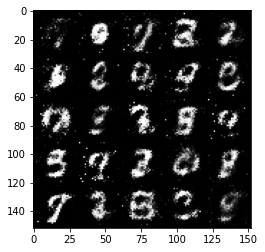

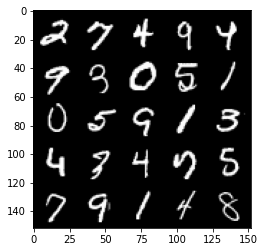

Epoch 9, disc loss - 0.5770524144172668, gen loss - 1.2656571865081787


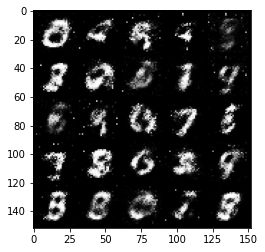

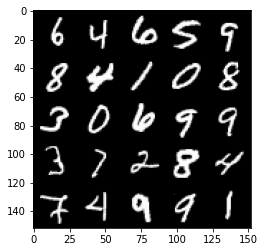

Epoch 10, disc loss - 0.5115867257118225, gen loss - 1.3078402280807495


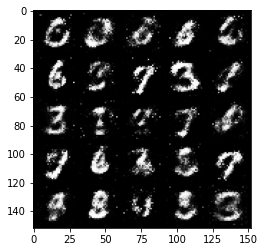

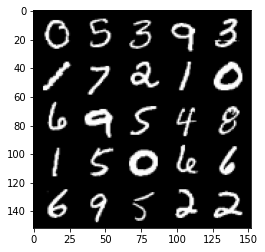

Epoch 11, disc loss - 0.618330717086792, gen loss - 1.0759211778640747


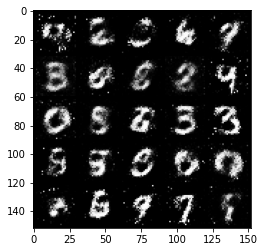

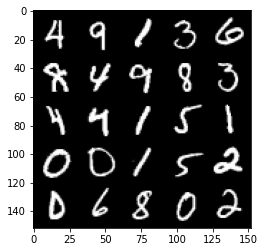

Epoch 12, disc loss - 0.5694278478622437, gen loss - 1.0186116695404053


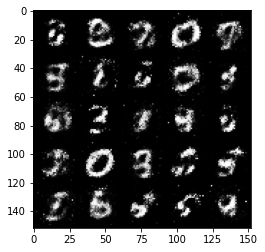

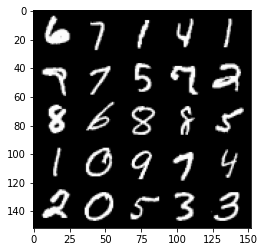

Epoch 13, disc loss - 0.6248186230659485, gen loss - 0.8763450384140015


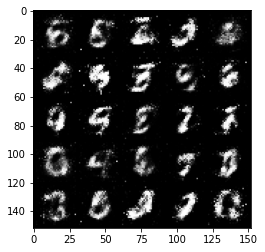

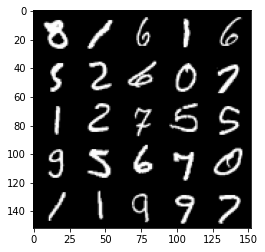

Epoch 14, disc loss - 0.6085866689682007, gen loss - 1.2235634326934814


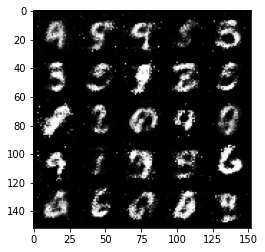

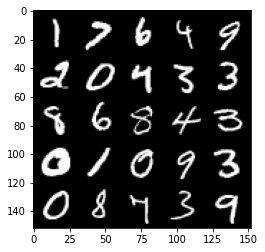

Epoch 15, disc loss - 0.7049305438995361, gen loss - 1.0031511783599854


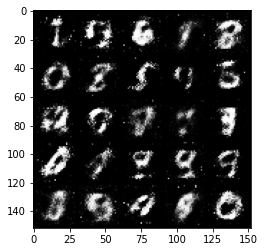

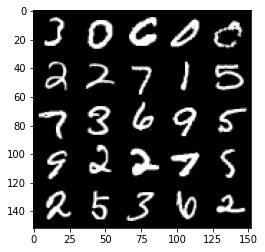

Epoch 16, disc loss - 0.4266165792942047, gen loss - 1.470123529434204


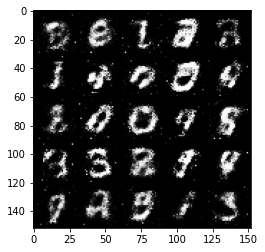

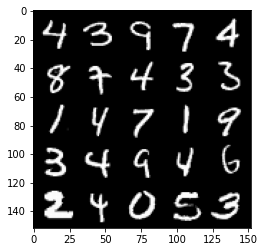

Epoch 17, disc loss - 0.6758082509040833, gen loss - 0.8527077436447144


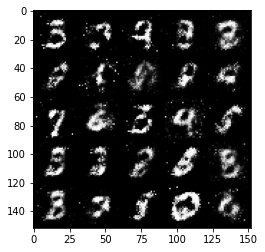

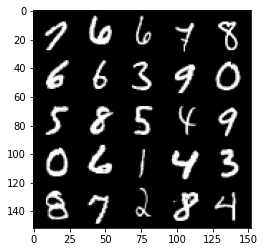

Epoch 18, disc loss - 0.5643779039382935, gen loss - 1.0951577425003052


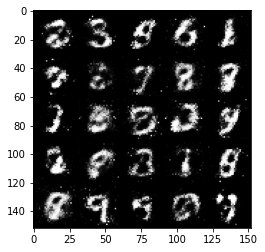

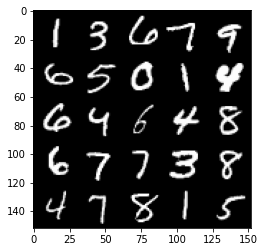

Epoch 19, disc loss - 0.8034937381744385, gen loss - 0.9658344984054565


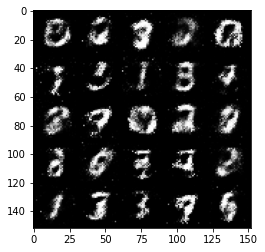

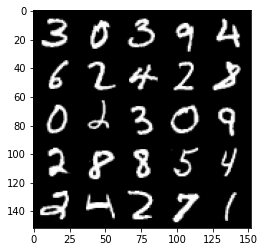

Epoch 20, disc loss - 0.6753368973731995, gen loss - 1.018423080444336


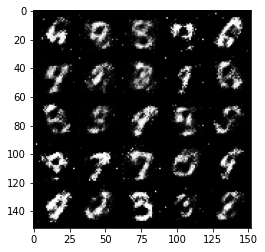

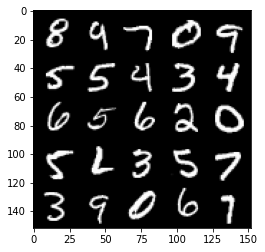

Epoch 21, disc loss - 0.6886166334152222, gen loss - 1.0554161071777344


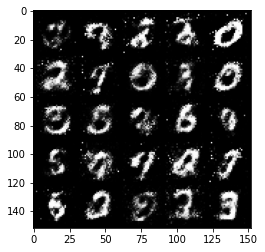

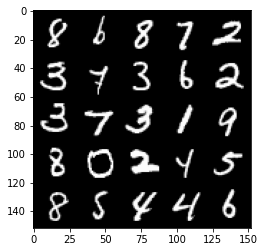

Epoch 22, disc loss - 0.5536356568336487, gen loss - 1.0863456726074219


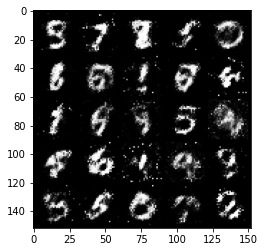

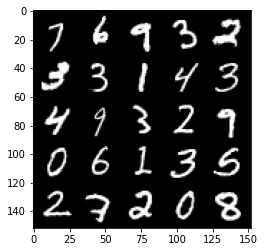

Epoch 23, disc loss - 0.655402660369873, gen loss - 0.9369555711746216


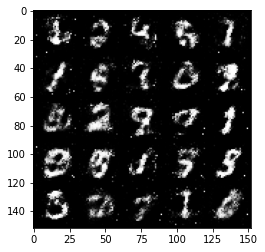

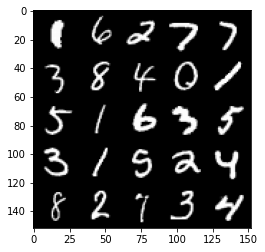

Epoch 24, disc loss - 0.6153128147125244, gen loss - 1.1979130506515503


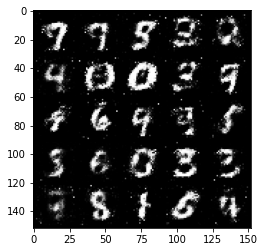

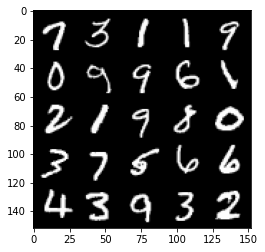

Epoch 25, disc loss - 0.7328041791915894, gen loss - 0.8709491491317749


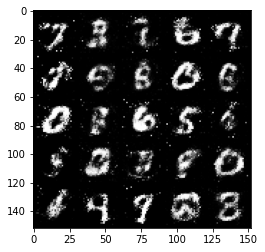

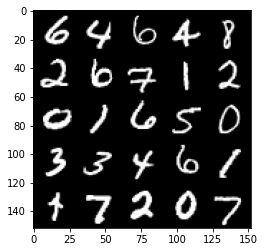

Epoch 26, disc loss - 0.6234064698219299, gen loss - 1.035697340965271


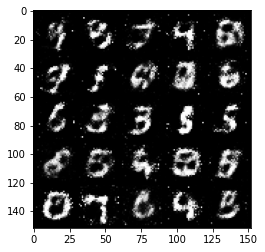

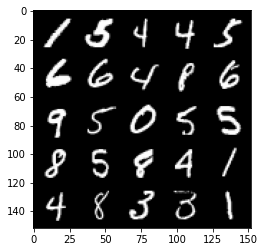

Epoch 27, disc loss - 0.5652549266815186, gen loss - 0.8525943160057068


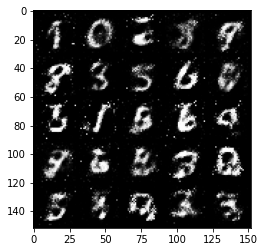

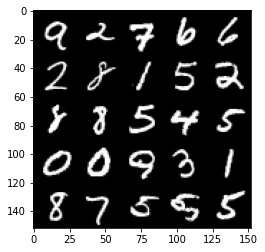

Epoch 28, disc loss - 0.6332176327705383, gen loss - 1.1804975271224976


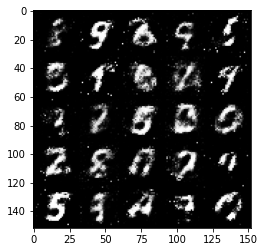

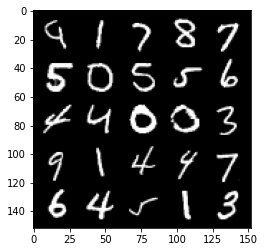

Epoch 29, disc loss - 0.682322084903717, gen loss - 0.8729679584503174


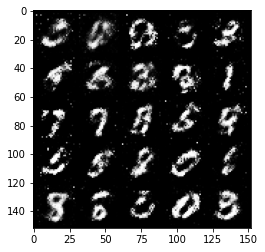

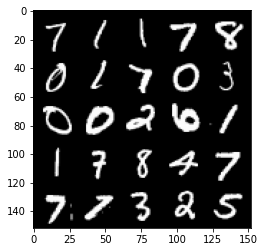

Epoch 30, disc loss - 0.5996216535568237, gen loss - 0.8731173872947693


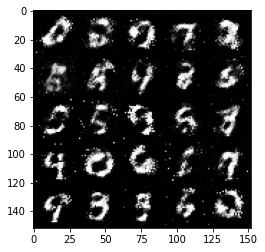

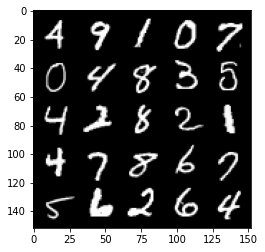

Epoch 31, disc loss - 0.5895707607269287, gen loss - 1.0393716096878052


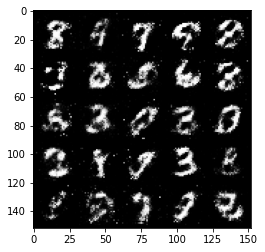

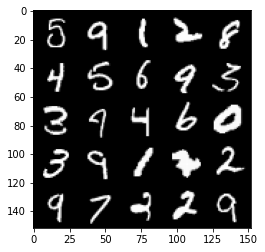

Epoch 32, disc loss - 0.679705023765564, gen loss - 0.8011074662208557


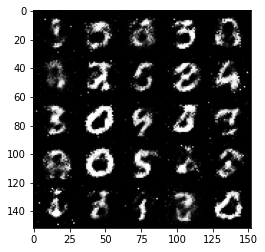

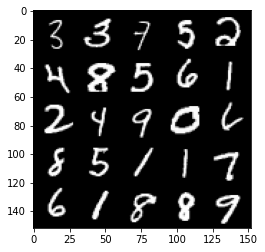

Epoch 33, disc loss - 0.636332631111145, gen loss - 1.0286686420440674


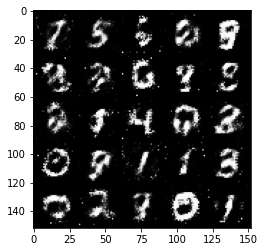

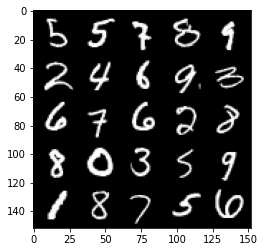

Epoch 34, disc loss - 0.6413291096687317, gen loss - 0.9841278195381165


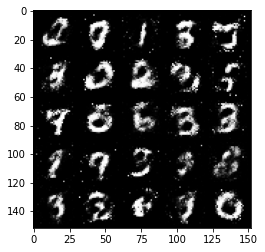

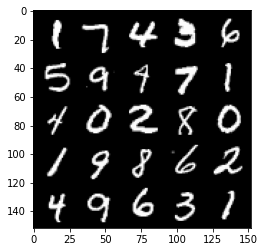

Epoch 35, disc loss - 0.6911718845367432, gen loss - 1.0812811851501465


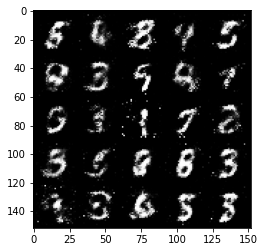

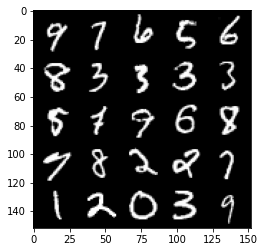

Epoch 36, disc loss - 0.6403997540473938, gen loss - 0.8886571526527405


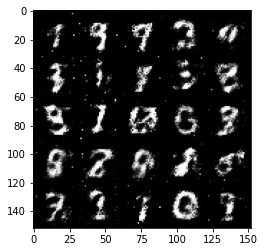

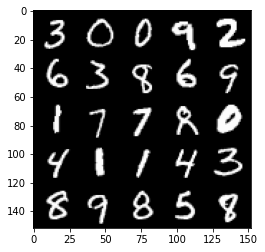

Epoch 37, disc loss - 0.6410539150238037, gen loss - 1.2032923698425293


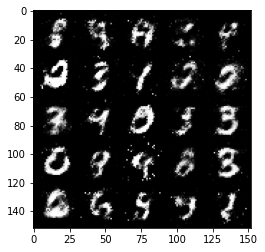

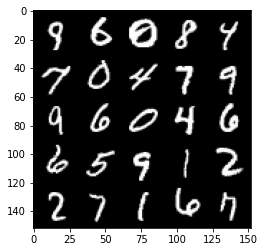

Epoch 38, disc loss - 0.6837929487228394, gen loss - 0.7846823930740356


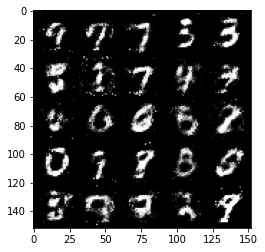

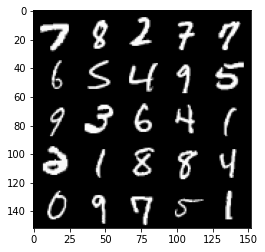

Epoch 39, disc loss - 0.6071170568466187, gen loss - 1.0459301471710205


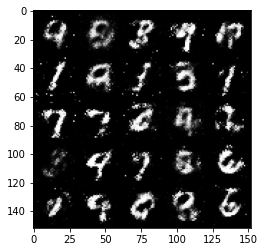

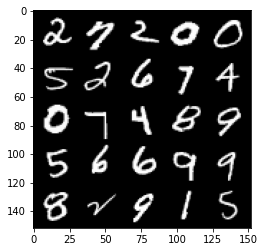

Epoch 40, disc loss - 0.657047688961029, gen loss - 0.8730279803276062


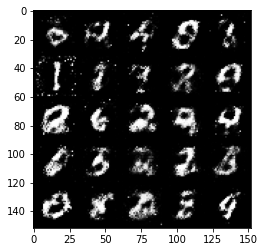

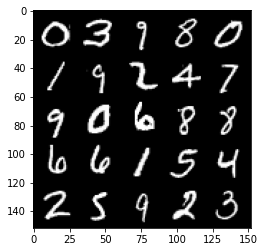

Epoch 41, disc loss - 0.6752014756202698, gen loss - 0.971168577671051


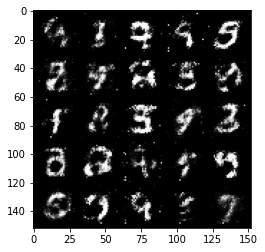

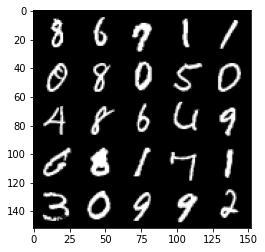

Epoch 42, disc loss - 0.7047843933105469, gen loss - 0.8015878796577454


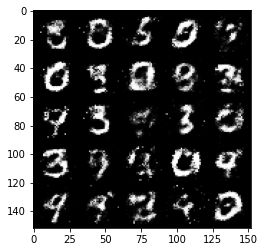

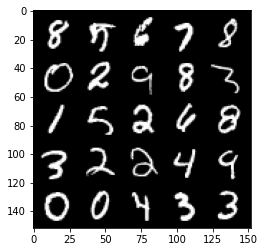

Epoch 43, disc loss - 0.6880682706832886, gen loss - 0.7675050497055054


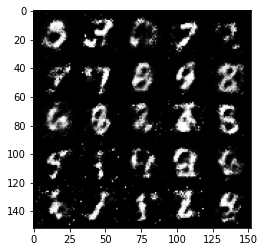

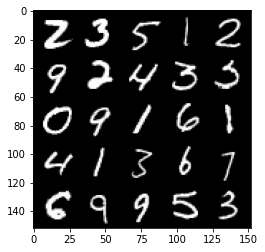

Epoch 44, disc loss - 0.7482979893684387, gen loss - 0.7673306465148926


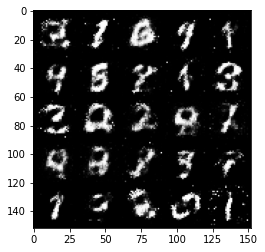

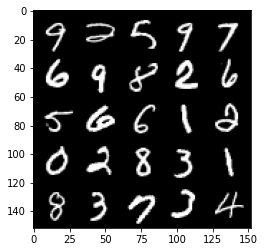

Epoch 45, disc loss - 0.6365013718605042, gen loss - 0.8749334216117859


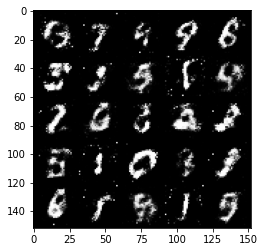

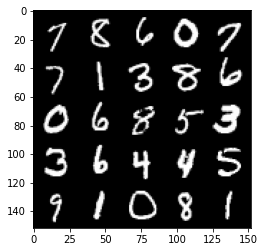

Epoch 46, disc loss - 0.604651689529419, gen loss - 1.0003935098648071


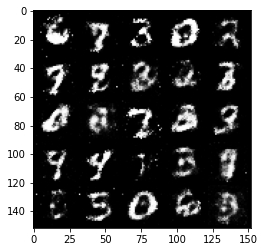

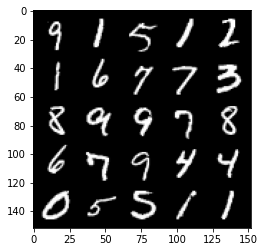

Epoch 47, disc loss - 0.6942235231399536, gen loss - 0.8869850039482117


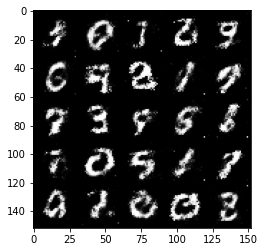

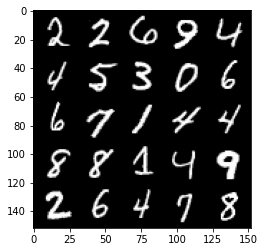

Epoch 48, disc loss - 0.6451296806335449, gen loss - 0.8249984979629517


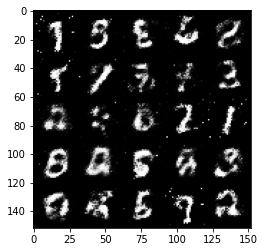

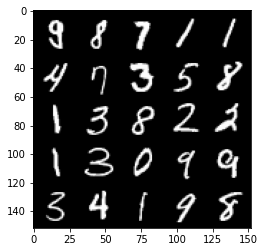

Epoch 49, disc loss - 0.5899887681007385, gen loss - 0.9073622226715088


In [ ]:
# Training loop
for epoch in range(num_epochs):
  step = 1
  for _, (real, _) in enumerate(dataloader):
    real = real.view(-1, 784).to(device)
    batch_size = real.shape[0]
    noise = torch.randn((batch_size, z_dim), device=device)

    # Train Discriminator
    fake = gen(noise)

    disc_fake = disc(fake).view(-1)
    disc_real = disc(real).view(-1)

    loss_d_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
    loss_d_real = criterion(disc_real, torch.ones_like(disc_real))
    loss_d = (loss_d_real + loss_d_fake) / 2

    disc.zero_grad()
    loss_d.backward(retain_graph=True)
    disc_opt.step()

    # Train Generator
    output = disc(fake).view(-1)
    loss_g = criterion(output, torch.ones_like(output))
    gen.zero_grad()
    loss_g.backward()
    gen_opt.step()

    # Display results
    if len(dataloader) == step:
      show_tensor_images(fake)
      show_tensor_images(real)
    step += 1

  print(f'Epoch {epoch}, disc loss - {loss_d}, gen loss - {loss_g}')